<a href="https://colab.research.google.com/github/cdr0101/Multithreading/blob/main/multithreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+------------------+--------+--------+--------+--------+--------+-------+-------+--------+--------+--------+
| Threads          | T=1    | T=2    | T=3    | T=4    | T=5    | T=6   | T=7   | T=8    | T=9    | T=10   |
+------------------+--------+--------+--------+--------+--------+-------+-------+--------+--------+--------+
| Time taken (sec) | 7.1927 | 6.3278 | 7.3599 | 6.1444 | 7.5864 | 6.087 | 7.494 | 6.0114 | 7.5956 | 6.1443 |
+------------------+--------+--------+--------+--------+--------+-------+-------+--------+--------+--------+


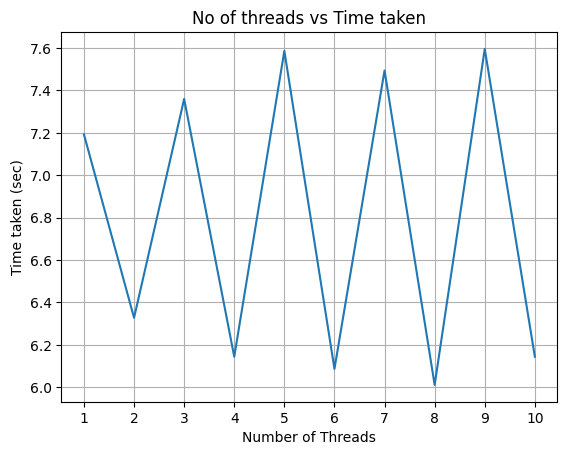

In [6]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

A = np.random.rand(1000, 1000) 

results = [None] * 100 

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices

results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table)) 

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()


## **METHODOLOGY:**

1. ***Function for matrix multiplication:***  matrix_multiply() is defined to perform matrix multiplication of two matrices (A and B) using np.dot(). It stores the answer at the specific index of result array.

2. ***Function for multiplication using threads:***  run_with_threads() is defined to perform matrix multiplication with a specified number of threads.
It first initializes a list threads to store the thread objects.
Then, it iterates over the list of matrices and creates a new thread for each matrix multiplication operation using threading.Thread() constructor.
Each thread is started using the start() method. After creating all threads, it waits for all threads to complete using the join() method. The function returns the time taken for the multiplication operations.

3. ***Matrices Definition:*** The constant matrix A of size 1000x1000 is generated using numpy.random.rand(). A list of 100 random matricesof the same size is created.

4. ***Execution:*** run_with_threads() function is called for each number of threads in the range from 1 to 10, and the time taken for each operation is recorded. The results are stored in the results_table list, along with the corresponding number of threads.

5. ***Results:*** The results are displayed in a table format using the tabulate() function.

6. ***Plotting:*** The number of threads and the corresponding time taken are plotted using matplotlib.pyplot.plot() and plot is displayed using plt.show().

### **OBSERVATIONS:**
The time taken is minimum for number of threads= 8 which is justified as there are 8 cores on my laptop.